## 线性SVM

#### 调库

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#### 创建数据

In [33]:
data = np.array([
                [0.1, 0.7],
                [0.3, 0.6],
                [0.4, 0.1],
                [0.5, 0.4],
                [0.8, 0.04],
                [0.42, 0.6],
                [0.9, 0.4],
                [0.6, 0.5],
                [0.7, 0.2],
                [0.7, 0.67],
                [0.27, 0.8],
                [0.5, 0.72]
                ])
label = [1]*6 + [0]*6
x_min,x_max = data[:,0].min()-0.2,data[:,0].max()+0.2
y_min,y_max = data[:,1].min()-0.2,data[:,1].max()+0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),
                     np.arange(y_min, y_max, 0.002)) # meshgrid如何生成网格

#### 训练模型

In [34]:
model_linear = svm.SVC(kernel='linear', C = 0.001)
model_linear.fit(data, label)
Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()]) #? nunpy.ravel()将多维数组将为一维,np.c_将xx和yy合并成两列
Z = Z.reshape(xx.shape)

#### 可视化决策边界

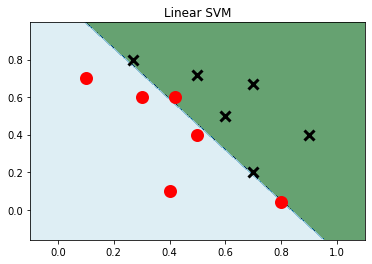

In [35]:
plt.contourf(xx, yy, Z, cmap = plt.cm.ocean, alpha=0.6) #? cmap：color map，alpha：透明度
plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3) 
plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
plt.title('Linear SVM')
plt.show()

## 多项式SVM

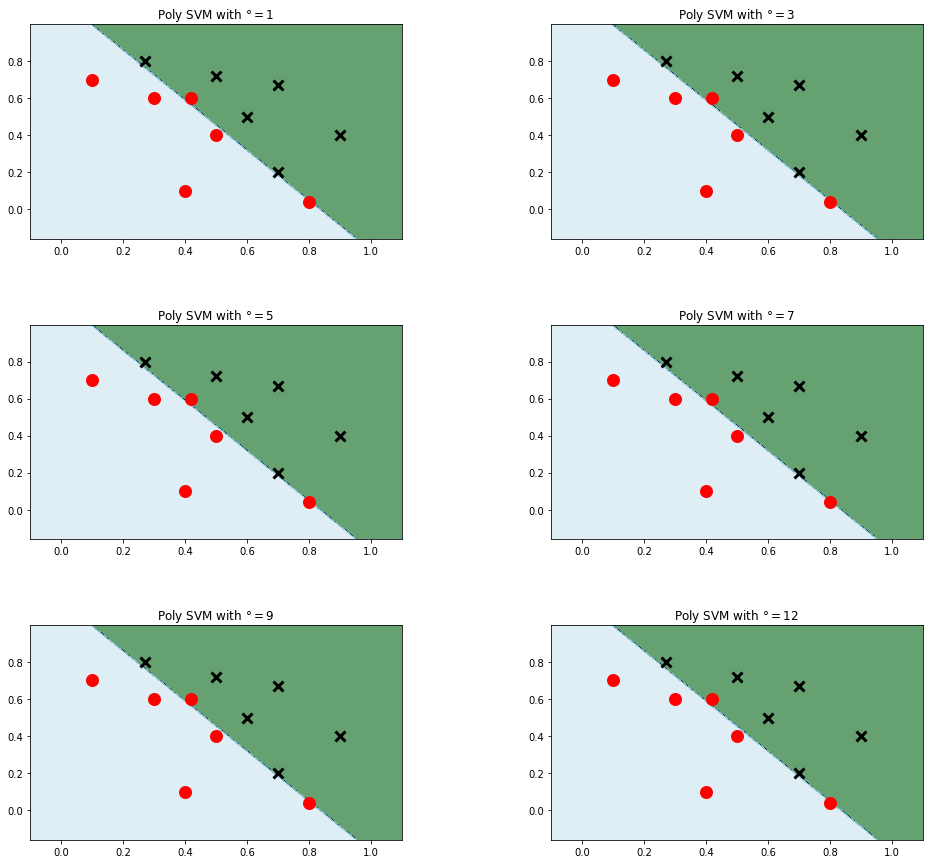

In [36]:
plt.figure(figsize=(16,15))

for i,degree in enumerate([1,3,5,7,9,12]):
    model_poly =svm.SVC(C=0.0001,kernel='poly',degree=degree) #? degree ：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略
    model_poly.fit(data,label)
    Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()]) #? nunpy.ravel()将多维数组将为一维,np.c_将xx和yy合并成两列
    Z = Z.reshape(xx.shape)
    plt.subplot(3, 2, i + 1)    #? 指3行2列的图中从左到右从上到下的第i+1个位置
    plt.subplots_adjust(wspace=0.4, hspace=0.4) #? 调整子图布局
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
    plt.title('Poly SVM with $\degree=$' + str(degree))
plt.show()

用法： matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
left:此参数是该图子图的左侧。
right:此参数是该图子图的右侧。
bottom:此参数是该图子图的底部。
top:此参数是该图子图的顶部。
wspace:此参数是为子图之间的空间保留的宽度量，表示为平均轴宽度的一部分。
hspace:此参数是为子图之间的空间保留的高度量，表示为平均轴高度的一部分。

## 高斯核SVM

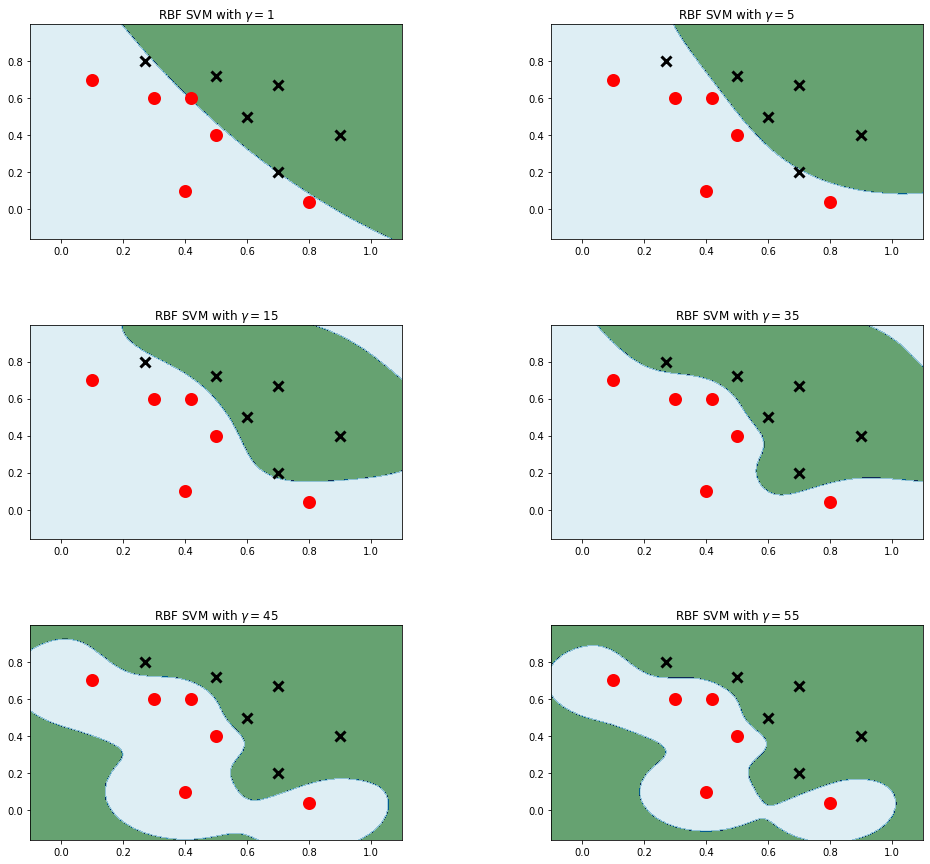

In [41]:
plt.figure(figsize=(16, 15))
 
for i, gamma in enumerate([1, 5, 15, 35, 45, 55]):
    model_rbf = svm.SVC(kernel='rbf', gamma=gamma, C= 0.0001).fit(data, label)
    Z = model_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
    plt.title('RBF SVM with $\gamma=$' + str(gamma))
plt.show()

## Mnist数据集

#### 调库调数据集

In [50]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn import svm

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset = datasets.MNIST(root='../dataset/mnist/',train=True,download=True,transform=transform)
test_dataset = datasets.MNIST(root='../dataset/mnist',train=False,download=True,transform=transform)
batch_size=len(train_dataset)
train_loader = DataLoader(train_dataset,shuffle=True,batch_size=batch_size)
test_loader = DataLoader(test_dataset,shuffle=False,batch_size=batch_size)

x_train,y_train = next(iter(train_loader))
x_test,y_test = next(iter(test_loader))

x_train,y_train = x_train.cpu().numpy(),y_train.cpu().numpy() # tensor转为array形式)
x_test,y_test = x_test.cpu().numpy(),y_test.cpu().numpy() # tensor转为array形式)

x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)

x_train, y_train= x_train[:2000], y_train[:2000] 
x_test, y_test = x_test[:200],y_test[:200]

In [52]:
model_linear=svm.SVC(C=100,kernel='linear')
model_linear.fit(x_train,y_train)
print('线性核函数的分数:',model_linear.score(x_test,y_test))

#! 多项式svm
for degree in range (1,10,2):
    model_poly = svm.SVC(C=100,kernel='poly',degree=degree)
    model_poly.fit(x_train,y_train)
    print('当多项式维度为：',degree,'时，分数为：',model_poly.score(x_test,y_test))

#! 高斯svm
for gamma in range(1,10,2):
    gamma = round(0.01 * gamma,3)
    model_rbf = svm.SVC(C=100,kernel='rbf',gamma=gamma)
    model_rbf.fit(x_train,y_train)
    print('当gamma为：',gamma,'时，分数为：',model_rbf.score(x_test,y_test))

线性核函数的分数: 0.92
当多项式维度为： 1 时，分数为： 0.92
当多项式维度为： 3 时，分数为： 0.945
当多项式维度为： 5 时，分数为： 0.86
当多项式维度为： 7 时，分数为： 0.7
当多项式维度为： 9 时，分数为： 0.575
当gamma为： 0.01 时，分数为： 0.74
当gamma为： 0.03 时，分数为： 0.21
当gamma为： 0.05 时，分数为： 0.195
当gamma为： 0.07 时，分数为： 0.2
当gamma为： 0.09 时，分数为： 0.14
